<h1>버스</h1>

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
path = '/Users/hwayeong/Desktop/rssi_ann/'

In [24]:
df_list = []
for i in range(0,10):
    s_name = 'm_'+str(i+1)
    #print(s_name)
    df_list.append(pd.read_excel(path + 'rssi_dataset.xlsx', engine='openpyxl', sheet_name=s_name))

In [25]:
df_list[0].head()

,mac,txpower,rssi
0,c2:02:0b:00:05:48,-59,-58
1,c2:02:0b:00:05:48,-59,-58
2,c2:02:0b:00:05:48,-59,-58
3,c2:02:0b:00:05:48,-59,-54
4,c2:02:0b:00:05:48,-59,-55


In [26]:
log_d = -0.02878307 * df_list[0]['rssi'] - 1.5813873130922256
df_list[0]['dist'] = log_d
print(log_d)

0          0.088031
1          0.088031
2          0.088031
3         -0.027102
4          0.001682
             ...   
1048570    0.375861
1048571    0.404645
1048572    0.260729
1048573    0.260729
1048574    0.289512
Name: rssi, Length: 1048575, dtype: float64


In [27]:
for i in range(0,10):    
    df_list[i]['dist'] = i+1
    
    log_d = math.log10(i+1)
    df_list[i]['log_d'] = log_d          
    #print(log_d)                                               #실제 거리에 로그값을 취함
    
    d = 10**((df_list[i]['txpower'] - df_list[i]['rssi'])/(10 * 2))                     #RSSI 이상적인 거리추정 모델
    df_list[i]['d'] = d
    #print(d)
    
    new_log_d = (df_list[i]['txpower'] - df_list[i]['rssi'])/(10 * 2)                   #new log d = (Txpower * rssi / 10 * 2)
    df_list[i]['new_log_d'] = new_log_d 
    #print(new_log_d)
    
    legacy_d = 0.89976 * (df_list[i]['rssi']/df_list[i]['txpower'])**(7.7095) + 0.111   #ibeacon 오픈소스에서 사용하는 수학모델 | 이상적인 환경만을 고려
    df_list[i]['ibeacon_d'] = legacy_d
   #print(legacy_d)

    proposed_d = 10**(-0.02885017 * df_list[i]['rssi'] - 1.58662651)                    #new_log_d 에서 로그를 제거 
    df_list[i]['proposed_d'] = proposed_d
   # print(proposed_d)
    
    #df_list[i].to_excel(excel_writer='/Users/hwayeong/Desktop/rssi_ann/'+'user_beacon_dataset_'+str(i+1)+'m.xlsx')
       
df_list[0].head()

,mac,txpower,rssi,dist,log_d,d,new_log_d,ibeacon_d,proposed_d
0,c2:02:0b:00:05:48,-59,-58,1,0.0,0.891251,-0.05,0.899663,1.220909
1,c2:02:0b:00:05:48,-59,-58,1,0.0,0.891251,-0.05,0.899663,1.220909
2,c2:02:0b:00:05:48,-59,-58,1,0.0,0.891251,-0.05,0.899663,1.220909
3,c2:02:0b:00:05:48,-59,-54,1,0.0,0.562341,-0.25,0.565604,0.936015
4,c2:02:0b:00:05:48,-59,-55,1,0.0,0.630957,-0.20,0.634684,1.000306


In [28]:
print(df_list)

[                       mac  txpower  rssi  dist  log_d         d  new_log_d  \
0        c2:02:0b:00:05:48      -59   -58     1    0.0  0.891251      -0.05   
1        c2:02:0b:00:05:48      -59   -58     1    0.0  0.891251      -0.05   
2        c2:02:0b:00:05:48      -59   -58     1    0.0  0.891251      -0.05   
3        c2:02:0b:00:05:48      -59   -54     1    0.0  0.562341      -0.25   
4        c2:02:0b:00:05:48      -59   -55     1    0.0  0.630957      -0.20   
...                    ...      ...   ...   ...    ...       ...        ...   
1048570  c2:02:0b:00:05:48      -59   -68     1    0.0  2.818383       0.45   
1048571  c2:02:0b:00:05:48      -59   -69     1    0.0  3.162278       0.50   
1048572  c2:02:0b:00:05:48      -59   -64     1    0.0  1.778279       0.25   
1048573  c2:02:0b:00:05:48      -59   -64     1    0.0  1.778279       0.25   
1048574  c2:02:0b:00:05:48      -59   -65     1    0.0  1.995262       0.30   

         ibeacon_d  proposed_d  
0         0.89966

In [29]:
t = pd.DataFrame(df_list[0][0:22589])
t_rssi = pd.DataFrame(df_list[0]['rssi'][0:22589])
t_log_d = pd.DataFrame(df_list[0]['log_d'][0:22589])
t_dist = pd.DataFrame(df_list[0]['dist'][0:22589])
t_d = pd.DataFrame(df_list[0]['d'][0:22589])
t_legacy_d = pd.DataFrame(df_list[0]['ibeacon_d'][0:22589])
t_proposed_d = pd.DataFrame(df_list[0]['proposed_d'][0:22589])
for i in range(1,10):
    t_rssi = pd.concat([pd.DataFrame(t_rssi), pd.DataFrame(df_list[i]['rssi'][0:22589])], axis=0, ignore_index=True) #axisi = 0 위 아래 합침
    t_log_d = pd.concat([pd.DataFrame(t_log_d), pd.DataFrame(df_list[i]['log_d'][0:22589])], axis=0, ignore_index=True)
    t_dist = pd.concat([pd.DataFrame(t_dist), pd.DataFrame(df_list[i]['dist'][0:22589])], axis=0, ignore_index=True)
    t_d = pd.concat([pd.DataFrame(t_d), pd.DataFrame(df_list[i]['d'][0:22589])], axis=0, ignore_index=True)
    t_legacy_d = pd.concat([pd.DataFrame(t_legacy_d), pd.DataFrame(df_list[i]['ibeacon_d'][0:22589])], axis=0, ignore_index=True)
    t_proposed_d = pd.concat([pd.DataFrame(t_proposed_d), pd.DataFrame(df_list[i]['proposed_d'][0:22589])], axis=0, ignore_index=True)

print(t_log_d)
# print(t_rssi)
# print(t_dist)

        log_d
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
225884    1.0
225885    1.0
225886    1.0
225887    1.0
225888    1.0

[225889 rows x 1 columns]


In [30]:
print(t.shape)


(22589, 9)


In [31]:
# plt.plot(t_rssi, t_dist.values.reshape(-1,1), 'k.') # 데이터 차원 변형
# plt.title('RSSI-Distance Graph')
# plt.xlabel('RSSI')
# plt.ylabel('Distance (m)')
# # plt.axis([-120,0,0,11])
# plt.grid(True)
# plt.show()

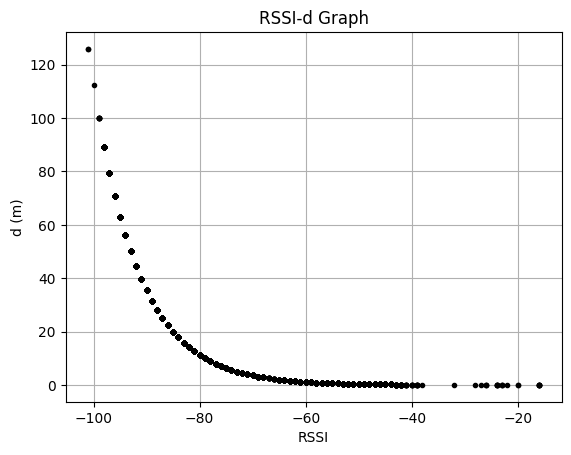

In [32]:
plt.plot(t_rssi.values, t_d.values.reshape(-1,1), 'k.') #x축 rssi y축 t_d
plt.title('RSSI-d Graph')
plt.xlabel('RSSI')
plt.ylabel('d (m)')
# plt.axis([-120,0,0,11])
plt.grid(True)
plt.show()

In [33]:
# test_size : 테스트 데이터 셋의 비율 | 갯수
# train size : 학습 데이터 셋의 비율 | 갯수
# random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값

X_train, X_test, y_train, y_test = train_test_split(t_rssi, t_log_d, train_size=0.9, random_state=42)


#X_train1, X_test1, y_train1, y_test1 = train_test_split(t_rssi, t_dist, train_size=0.9, random_state=42) #rssi - distance model

print(len(X_train),len(X_test))

# print(X_test)
# print(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

203300 22589
(203300, 1)
(203300, 1)
(22589, 1)
(22589, 1)
(203300, 1)


In [45]:
model = LinearRegression()
model.fit(X_train, y_train)             # 훈련모델 fit

y_pred = model.predict(X_test)          # x 값을 넣어 y값을 예측 할수 있다.

print('기울기 : ',model.coef_,'절편 : ',model.intercept_)

#accuracy = model.score(X_test, y_test)  # 모형 성능 평가
#print(accuracy) 




기울기 :  [[-0.02885017]] 절편 :  [-1.58662651]


In [35]:
# model = LinearRegression()
# model.fit(X_train1, y_train1)             # 훈련모델 fit

# y_pred1 = model.predict(X_test1)          # x 값을 넣어 y값을 예측 할수 있다.

# print('기울기 : ',model.coef_,'절편 : ',model.intercept_)

# accuracy = model.score(X_test, y_test)  # 모형 성능 평가
# print(accuracy)                           #rssi - distance model

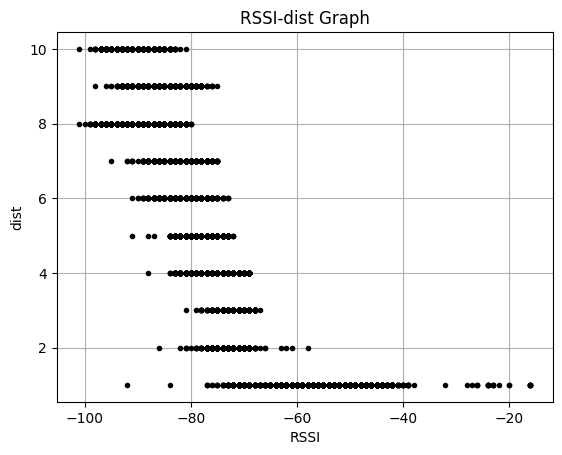

In [36]:
plt.plot(t_rssi.values, t_dist.values, 'k.')
#plt.plot(X_test1.values, y_pred1, 'r-')
plt.title('RSSI-dist Graph')
plt.xlabel('RSSI')
plt.ylabel('dist')
#plt.axis([-120,0,0,11])
plt.grid(True)
plt.savefig('./fig1.png')
plt.show()

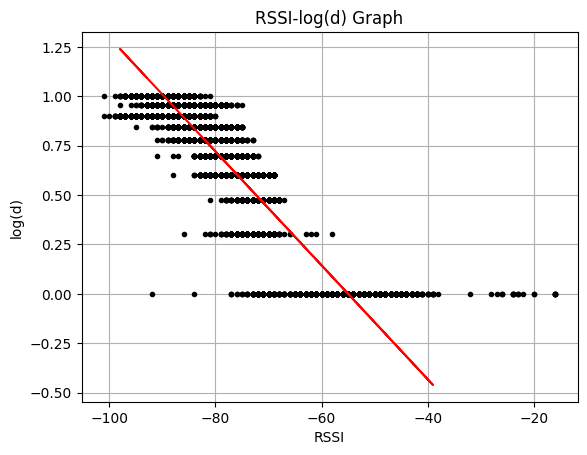

In [37]:
plt.plot(t_rssi.values, t_log_d.values, 'k.')
plt.plot(X_test.values, y_pred, 'r-')
plt.title('RSSI-log(d) Graph')
plt.xlabel('RSSI')
plt.ylabel('log(d)')
#plt.axis([-120,0,0,11])
plt.grid(True)
plt.savefig('/Users/hwayeong/Desktop/rssi_ann/' + './fig1.png')
plt.show()


Proposed Model RMSE: 1.3157270949260609
Legacy Model RMSE: 7.186909051499584
Proposed Model RMSE: 5.523589118735144
향상도: 0.23143745396602458


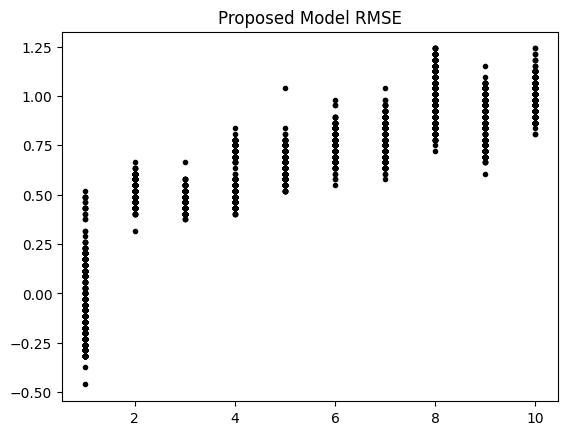

In [52]:
legacy_train,legacy_test = train_test_split(t_legacy_d,train_size=0.9, random_state=42)
proposed_train,proposed_test = train_test_split(t_proposed_d,train_size=0.9, random_state=42)   #log d 에서 log를 상쇄한 값 t_proposed_d
y_test_true, y_true = train_test_split(t_dist, train_size=0.9, random_state=42)                 #오차추정 데이터 , 실제 거리 (추정거리x)

proposed_RMSE = np.sqrt(mean_squared_error(proposed_test, y_true))                              #rmse 제곱근 편차 y는 distance test set
legacy_RMSE =np.sqrt(mean_squared_error(legacy_test, y_true))                                   #train set으로 훈련 test set으로 측정?


print("Proposed Model RMSE:",proposed_RMSE)
print("Legacy Model RMSE:",legacy_RMSE)


proposed_RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
print("Proposed Model RMSE:",proposed_RMSE)
#측정용 시각화 
plt.plot(y_true, y_pred, 'k.')
plt.title('Proposed Model RMSE')




print('향상도:',(legacy_RMSE-proposed_RMSE)/legacy_RMSE)                                        #증감률

Legacy Model RMSE: 7.1937278807197815


Text(0.5, 1.0, 'Legacy Model RMSE')

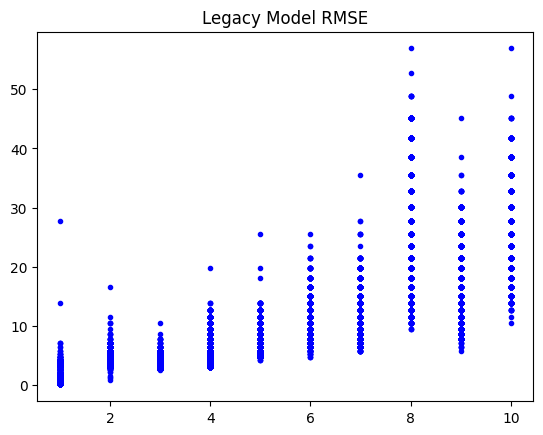

In [53]:
#측정용 출력값
legacy_RMSE =np.sqrt(mean_squared_error(t_dist, t_legacy_d))
print("Legacy Model RMSE:",legacy_RMSE)
plt.plot(t_dist, t_legacy_d, 'b.')
plt.title('Legacy Model RMSE')

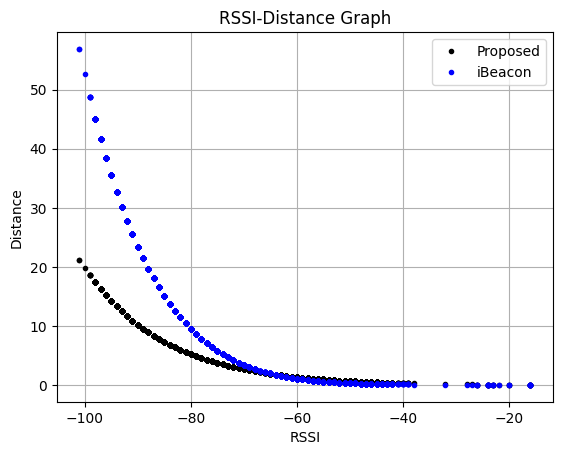

In [39]:
plt.plot(t_rssi.values, t_proposed_d.values, 'k.')
plt.plot(t_rssi.values, t_legacy_d.values, 'b.')

plt.title('RSSI-Distance Graph')
plt.xlabel('RSSI')

plt.ylabel('Distance')
plt.legend(['Proposed','iBeacon'])
plt.grid(True)
plt.show()

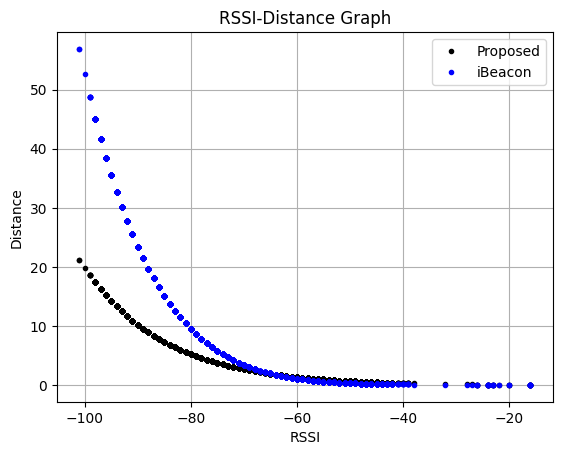

In [40]:
plt.plot(t_rssi.values, t_proposed_d.values, 'k.')
plt.plot(t_rssi.values, t_legacy_d.values, 'b.')
#plt.plot(t_rssi.values, t_dist.values, 'r.')

plt.title('RSSI-Distance Graph')
plt.xlabel('RSSI')
plt.ylabel('Distance')
plt.legend(['Proposed','iBeacon'])
plt.grid(True)
plt.savefig('./fig3.png')
plt.show()

In [ ]:
plt.plot(t_rssi.values, )

In [41]:
# ub_df = pd.read_excel('./user_beacon_dataset_1m.xlsx', engine='openpyxl')
# ub_df = ub_df[0:22589] 


In [42]:
# ub_df.head()
# print(ub_df['proposed_d'][0])

# for i in range(len(ub_df)):
#     if (ub_df['proposed_d'][i]) < 1:
#         print('하차')

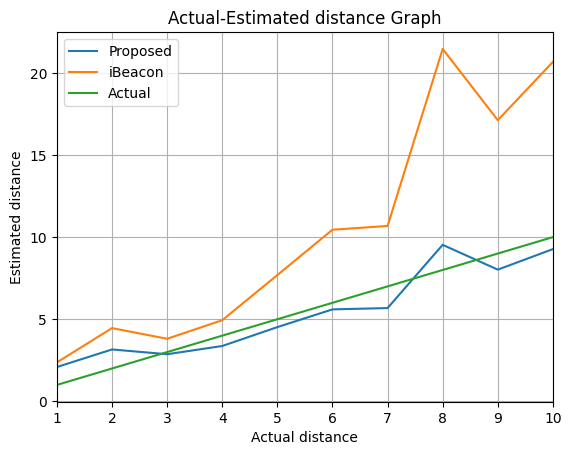

In [43]:
# BLE tag receiver 및 BLE tag 간 거리 추정 오차 (거리 추정 정확도)
# 버스 

actual_dist = [1,2,3,4,5,6,7,8,9,10] #실제 거리
LR_est_dist = [2.09,3.16,2.87,3.37,4.52,5.60,5.68,9.53,8.02,9.27] # 추정거리의 평균
iB_est_dist = [2.37,4.46,3.81,4.94,7.69,10.45,10.68,21.46,17.12,20.67]
 
LR_RMSE = [1.29,1.24,0.28,0.89,1.04,0.86,5.82,2.48,1.93,1.51]  # 실제 거리 기준 오차 값
iB_RMSE = [1.91,2.64,0.97,1.77,3.56,4.89,15.98,14.62,9.36,11.36]

plt.plot(actual_dist,LR_est_dist)
plt.plot(actual_dist,iB_est_dist)
plt.plot(actual_dist,actual_dist)
plt.title('Actual-Estimated distance Graph')
plt.xlabel('Actual distance')
plt.ylabel('Estimated distance')
plt.xlim((1,10))
plt.legend(['Proposed','iBeacon','Actual'])
plt.grid(True)
plt.show()




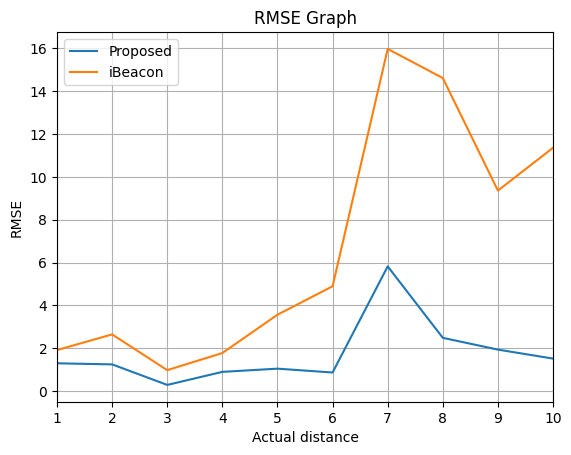

In [44]:
plt.plot(actual_dist,LR_RMSE)
plt.plot(actual_dist,iB_RMSE)
# plt.plot(actual_dist,actual_dist)
plt.title('RMSE Graph')
plt.xlabel('Actual distance')
plt.ylabel('RMSE')
plt.xlim((1,10))
plt.legend(['Proposed','iBeacon','Actual'])
plt.grid(True)
plt.show()